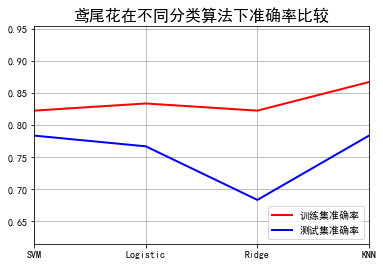

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ChangedBehaviorWarning
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier


# 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore', category=ChangedBehaviorWarning)

#读取数据
# 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
data = pd.read_csv('data/mohan.csv', header=None)
x, y = data[list(range(4))], data[4]
y = pd.Categorical(y).codes #把文本数据进行编码
x = x[[0,1]]

#数据分割
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=28, train_size=0.6)
svm = SVC(C=1, kernel='linear')

# 模型训练
svm.fit(x_train, y_train)
svm.intercept_
lr = LogisticRegression()
rc = RidgeClassifier()
knn = KNeighborsClassifier()

#模型准确率得分
lr.fit(x_train, y_train)
rc.fit(x_train, y_train)
knn.fit(x_train, y_train)
svm_score1 = accuracy_score(y_train, svm.predict(x_train))
svm_score2 = accuracy_score(y_test, svm.predict(x_test))

lr_score1 = accuracy_score(y_train, lr.predict(x_train))
lr_score2 = accuracy_score(y_test, lr.predict(x_test))

rc_score1 = accuracy_score(y_train, rc.predict(x_train))
rc_score2 = accuracy_score(y_test, rc.predict(x_test))

knn_score1 = accuracy_score(y_train, knn.predict(x_train))
knn_score2 = accuracy_score(y_test, knn.predict(x_test))
#不同模型准确率画图
x_tmp = [0,1,2,3]
y_score1 = [svm_score1, lr_score1, rc_score1, knn_score1]
y_score2 = [svm_score2, lr_score2, rc_score2, knn_score2]

plt.figure(facecolor='w')
plt.plot(x_tmp, y_score1, 'r-', lw=2, label=u'训练集准确率')
plt.plot(x_tmp, y_score2, 'b-', lw=2, label=u'测试集准确率')
plt.xlim(0, 3)
plt.ylim(np.min((np.min(y_score1), np.min(y_score2)))*0.9, np.max((np.max(y_score1), np.max(y_score2)))*1.1)
plt.legend(loc = 'lower right')
plt.title(u'鸢尾花在不同分类算法下准确率比较', fontsize=16)
plt.xticks(x_tmp, [u'SVM', u'Logistic', u'Ridge', u'KNN'], rotation=0)
plt.grid(b=True)
plt.show()

<ipython-input-5-766271728646>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x1, x2, svm_grid_hat, cmap=cm_light)
<ipython-input-5-766271728646>:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x1, x2, lr_grid_hat, cmap=cm_light)
<ipython-input-5-766271728646>:56: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals

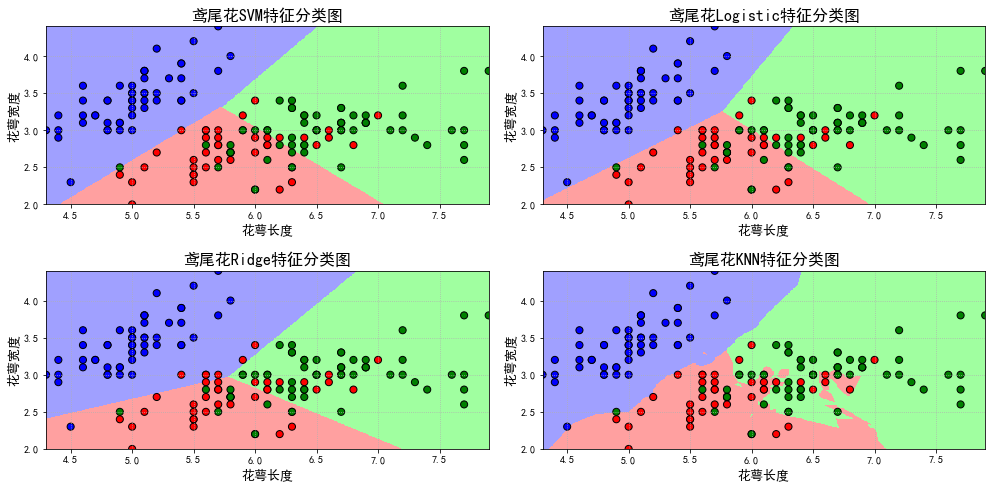

In [5]:
N = 500
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
 
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
grid_show = np.dstack((x1.flat, x2.flat))[0] # 测试点
svm_grid_hat = svm.predict(grid_show)
svm_grid_hat = svm_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
 
lr_grid_hat = lr.predict(grid_show)
lr_grid_hat = lr_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
 
rc_grid_hat = rc.predict(grid_show)
rc_grid_hat = rc_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
 
knn_grid_hat = knn.predict(grid_show)
knn_grid_hat = knn_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
cm_light = mpl.colors.ListedColormap(['#A0A0FF','#FFA0A0','#A0FFA0'])

cm_dark = mpl.colors.ListedColormap(['b', 'r', 'g'])
plt.figure(facecolor='w', figsize=(14,7))
plt.subplot(221)
#区域图
plt.pcolormesh(x1, x2, svm_grid_hat, cmap=cm_light)
# 样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
#测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     
# lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM特征分类图', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.subplot(222)
# 区域图
plt.pcolormesh(x1, x2, lr_grid_hat, cmap=cm_light)
# 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
# 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
# lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花Logistic特征分类图', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.subplot(223)
# 区域图
plt.pcolormesh(x1, x2, rc_grid_hat, cmap=cm_light)
# 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
# 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
# lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花Ridge特征分类图', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.subplot(224)
# 区域图
plt.pcolormesh(x1, x2, knn_grid_hat, cmap=cm_light)
# 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
# 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
# lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花KNN特征分类图', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.show()